In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [52]:
cannabis = pd.read_csv("https://www.dropbox.com/s/s2a1uoiegitupjc/cannabis_full.csv?dl=1")
cannabis = cannabis.dropna()

cannabis

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Part One: Binary Classification
Create a dataset that is limited only to the Sativa and Indica type cannabis strains.

This section asks you to create a final best model for each of the four new model types studied this week: LDA, QDA, SVC, and SVM. For SVM, you may limit yourself to only the polynomial kernel.

For each, you should:

Choose a metric you will use to select your model, and briefly justify your choice. (Hint: There is no specific target category here, so this should not be a metric that only prioritizes one category.)

Find the best model for predicting the Type variable. Don’t forget to tune any hyperparameters.

Report the (cross-validated!) metric.

Fit the final model.

Output a confusion matrix.

In [37]:
cannabis1 = cannabis[(cannabis["Type"] == "sativa") | (cannabis["Type"] == "indica")]
X = cannabis1.drop(["Strain", "Type", "Effects", "Flavor"], axis = 1)
y = cannabis1["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Q1: LDA

In [38]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

LDA_scores = cross_val_score(LDA, X_train, y_train, cv = 5)

print(f"Cross-validated Accuracy: {LDA_scores.mean()}")
print("Confusion Matrix:\n", confusion_matrix(y_test, LDA.predict(X_test)))
print("Classification Report:\n", classification_report(y_test, LDA.predict(X_test)))

Cross-validated Accuracy: 0.8322139225409579
Confusion Matrix:
 [[119  18]
 [ 19  68]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.86      0.87      0.87       137
      sativa       0.79      0.78      0.79        87

    accuracy                           0.83       224
   macro avg       0.83      0.83      0.83       224
weighted avg       0.83      0.83      0.83       224



#Q2: QDA

In [54]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)

QDA_scores = cross_val_score(QDA, X_train, y_train, cv = 5)

print(f"Cross-validated Accuracy: {QDA_scores.mean()}")
print("Confusion Matrix:\n", confusion_matrix(y_test, QDA.predict(X_test)))
print("Classification Report:\n", classification_report(y_test, QDA.predict(X_test)))

Cross-validated Accuracy: 0.22805897629220073
Confusion Matrix:
 [[  5  14 276]
 [  3  13 146]
 [  4   3 113]]
Classification Report:
               precision    recall  f1-score   support

      hybrid       0.42      0.02      0.03       295
      indica       0.43      0.08      0.14       162
      sativa       0.21      0.94      0.35       120

    accuracy                           0.23       577
   macro avg       0.35      0.35      0.17       577
weighted avg       0.38      0.23      0.13       577



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


#Q3: SVC

In [ ]:
SVC = SVC()
param_grid = {"C": [0.1, 1, 10, 100], "gamma": [1, 0.1, 0.01, 0.001], "kernel": ["linear"]}
grid_SVC = GridSearchCV(SVC, param_grid, refit = True, verbose = 2, cv = 5)
grid_SVC.fit(X_train, y_train)

print("Best parameters found: ", grid_SVC.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, grid_SVC.predict(X_test)))
print("Classification Report:\n", classification_report(y_test, grid_SVC.predict(X_test)))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.01, k

#Q4: SVM

In [41]:
SVM_poly = SVC(kernel = "poly", degree = 3)
SVM_poly.fit(X_train, y_train)

SVM_poly_scores = cross_val_score(SVM_poly, X_train, y_train, cv = 5)

print(f"Cross-validated Accuracy: {SVM_poly_scores.mean()}")
print("Confusion Matrix:\n", confusion_matrix(y_test, SVM_poly.predict(X_test)))
print("Classification Report:\n", classification_report(y_test, SVM_poly.predict(X_test)))

Cross-validated Accuracy: 0.70023225158496
Confusion Matrix:
 [[126  11]
 [ 53  34]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.70      0.92      0.80       137
      sativa       0.76      0.39      0.52        87

    accuracy                           0.71       224
   macro avg       0.73      0.66      0.66       224
weighted avg       0.72      0.71      0.69       224



#Part Two: Natural Multiclass
Now use the full dataset, including the Hybrid strains.

Q1
Fit a decision tree, plot the final fit, and interpret the results.

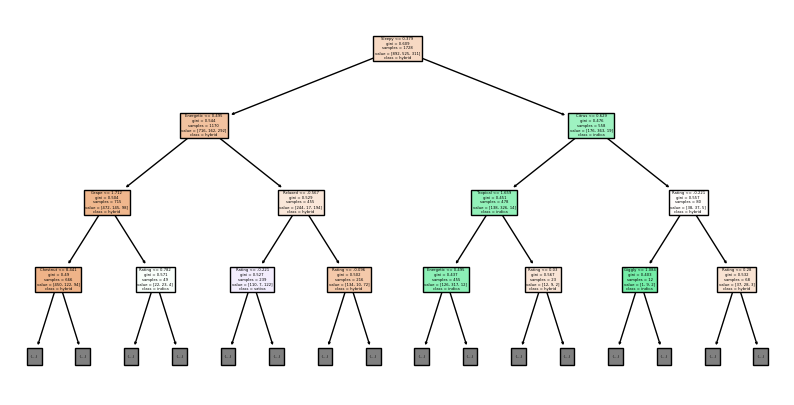

In [42]:
X = cannabis.drop(["Strain", "Type", "Effects", "Flavor"], axis = 1)
y = cannabis["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

plt.figure(figsize = (10,5))
tree.plot_tree(dt, filled = True, feature_names=X.columns, class_names=dt.classes_, max_depth = 3)
plt.show()

In [43]:
print("Confusion Matrix:\n", confusion_matrix(y_test, dt.predict(X_test)))
print("Classification Report:\n", classification_report(y_test, dt.predict(X_test)))

Confusion Matrix:
 [[178  77  40]
 [ 67  84  11]
 [ 73  15  32]]
Classification Report:
               precision    recall  f1-score   support

      hybrid       0.56      0.60      0.58       295
      indica       0.48      0.52      0.50       162
      sativa       0.39      0.27      0.32       120

    accuracy                           0.51       577
   macro avg       0.47      0.46      0.46       577
weighted avg       0.50      0.51      0.50       577



Q2 Repeat the analyses from Part One for LDA, QDA, and KNN.

In [44]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

print("LDA Confusion Matrix:\n", confusion_matrix(y_test, LDA.predict(X_test)))
print("LDA Classification Report:\n", classification_report(y_test, LDA.predict(X_test)))

QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)

print("QDA Confusion Matrix:\n", confusion_matrix(y_test, QDA.predict(X_test)))
print("QDA Classification Report:\n", classification_report(y_test, QDA.predict(X_test)))

KNN = KNeighborsClassifier()
param_grid_KNN = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}
grid_KNN = GridSearchCV(KNN, param_grid_KNN, cv = 5)
grid_KNN.fit(X_train, y_train)

print("Best KNN parameters:", grid_KNN.best_params_)
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, grid_KNN.predict(X_test)))
print("KNN Classification Report:\n", classification_report(y_test, grid_KNN.predict(X_test)))

LDA Confusion Matrix:
 [[211  56  28]
 [ 62  96   4]
 [ 62   9  49]]
LDA Classification Report:
               precision    recall  f1-score   support

      hybrid       0.63      0.72      0.67       295
      indica       0.60      0.59      0.59       162
      sativa       0.60      0.41      0.49       120

    accuracy                           0.62       577
   macro avg       0.61      0.57      0.58       577
weighted avg       0.62      0.62      0.61       577

QDA Confusion Matrix:
 [[ 21  74 200]
 [ 14  54  94]
 [  7  16  97]]
QDA Classification Report:
               precision    recall  f1-score   support

      hybrid       0.50      0.07      0.12       295
      indica       0.38      0.33      0.35       162
      sativa       0.25      0.81      0.38       120

    accuracy                           0.30       577
   macro avg       0.37      0.40      0.29       577
weighted avg       0.41      0.30      0.24       577



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Best KNN parameters: {'n_neighbors': 15}
KNN Confusion Matrix:
 [[230  60   5]
 [ 89  73   0]
 [ 95  11  14]]
KNN Classification Report:
               precision    recall  f1-score   support

      hybrid       0.56      0.78      0.65       295
      indica       0.51      0.45      0.48       162
      sativa       0.74      0.12      0.20       120

    accuracy                           0.55       577
   macro avg       0.60      0.45      0.44       577
weighted avg       0.58      0.55      0.51       577



Q3
Were your metrics better or worse than in Part One? Why? Which categories were most likely to get mixed up, according to the confusion matrices? Why?

The metrics in Part One (binary categorization of Sativa and Indica) were typically better than those of Part Two (multiclass classification including hybrid strains), according to the research. It is most likely because of the increased difficulty of differentiating between three categories (Hybrid, Indica, and Sativa) rather than simply two that performance has decreased. It is intrinsically harder for the models to distinguish between many classes in multiclass classification, particularly when the classes have similar attributes.

It seems that the Hybrid category was most commonly confused with the other two, based on the confusion matrices. This is most likely due to the fact that hybrid strains frequently exhibit traits from both Indica and Sativa, which makes them less distinctive and more challenging to categorize. As a result, the models may have had trouble identifying distinctive characteristics that regularly distinguished Hybrid strains from one another. Although less obvious, there was still some misunderstanding between Sativa and Indica, indicating that there may be some similarities between their traits. All things considered, our findings demonstrate the complexity of cannabis strain categorization and the difficulties in applying machine learning algorithms to differentiate between strains that have similar characteristics.


#Part Three: Multiclass from Binary

Consider two models designed for binary classification: SVC and Logistic Regression.

Q1
Fit and report metrics for OvR versions of the models. That is, for each of the two model types, create three models:

Indica vs. Not Indica

Sativa vs. Not Sativa

Hybrid vs. Not Hybrid

In [33]:
y_indica = (cannabis["Type"] == "indica").astype(int)

X_train, X_test, y_train_indica, y_test_indica = train_test_split(X, y_indica, test_size = 0.25, random_state = 42)

LR_indica = LogisticRegression()
LR_indica.fit(X_train, y_train_indica)

print("Logistic Regression - Indica vs. Not Indica")
print("Confusion Matrix:\n", confusion_matrix(y_test_indica, LR_indica.predict(X_test)))
print("Classification Report:\n", classification_report(y_test_indica, LR_indica.predict(X_test)))

SVC_indica = SVC()
SVC_indica.fit(X_train, y_train_indica)

print("SVC - Indica vs. Not Indica")
print("Confusion Matrix:\n", confusion_matrix(y_test_indica, SVC_indica.predict(X_test)))
print("Classification Report:\n", classification_report(y_test_indica, SVC_indica.predict(X_test)))

Logistic Regression - Indica vs. Not Indica
Confusion Matrix:
 [[361  54]
 [ 69  93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       415
           1       0.63      0.57      0.60       162

    accuracy                           0.79       577
   macro avg       0.74      0.72      0.73       577
weighted avg       0.78      0.79      0.78       577

SVC - Indica vs. Not Indica
Confusion Matrix:
 [[346  69]
 [ 64  98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       415
           1       0.59      0.60      0.60       162

    accuracy                           0.77       577
   macro avg       0.72      0.72      0.72       577
weighted avg       0.77      0.77      0.77       577



In [34]:
y_sativa = (cannabis["Type"] == "sativa").astype(int)

X_train, X_test, y_train_sativa, y_test_sativa = train_test_split(X, y_sativa, test_size = 0.25, random_state = 42)

LR_sativa = LogisticRegression()
LR_sativa.fit(X_train, y_train_sativa)

print("Logistic Regression - Sativa vs. Not Sativa")
print("Confusion Matrix:\n", confusion_matrix(y_test_sativa, LR_sativa.predict(X_test)))
print("Classification Report:\n", classification_report(y_test_sativa, LR_sativa.predict(X_test)))

SVC_sativa = SVC()
SVC_sativa.fit(X_train, y_train_sativa)

print("SVC - Sativa vs. Not Sativa")
print("Confusion Matrix:\n", confusion_matrix(y_test_sativa, SVC_sativa.predict(X_test)))
print("Classification Report:\n", classification_report(y_test_sativa, SVC_sativa.predict(X_test)))

Logistic Regression - Sativa vs. Not Sativa
Confusion Matrix:
 [[440  17]
 [ 86  34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       457
           1       0.67      0.28      0.40       120

    accuracy                           0.82       577
   macro avg       0.75      0.62      0.65       577
weighted avg       0.80      0.82      0.79       577

SVC - Sativa vs. Not Sativa
Confusion Matrix:
 [[457   0]
 [120   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       457
           1       0.00      0.00      0.00       120

    accuracy                           0.79       577
   macro avg       0.40      0.50      0.44       577
weighted avg       0.63      0.79      0.70       577



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
y_hybrid = (cannabis["Type"] == "hybrid").astype(int)

X_train, X_test, y_train_hybrid, y_test_hybrid = train_test_split(X, y_hybrid, test_size = 0.25, random_state = 42)

LR_hybrid = LogisticRegression()
LR_hybrid.fit(X_train, y_train_hybrid)

print("Logistic Regression - Hybrid vs. Not Hybrid")
print("Confusion Matrix:\n", confusion_matrix(y_test_hybrid, LR_hybrid.predict(X_test)))
print("Classification Report:\n", classification_report(y_test_hybrid, LR_hybrid.predict(X_test)))

SVC_hybrid = SVC()
SVC_hybrid.fit(X_train, y_train_hybrid)

print("SVC - Hybrid vs. Not Hybrid")
print("Confusion Matrix:\n", confusion_matrix(y_test_hybrid, SVC_hybrid.predict(X_test)))
print("Classification Report:\n", classification_report(y_test_hybrid, SVC_hybrid.predict(X_test)))

Logistic Regression - Hybrid vs. Not Hybrid
Confusion Matrix:
 [[140 142]
 [ 88 207]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.50      0.55       282
           1       0.59      0.70      0.64       295

    accuracy                           0.60       577
   macro avg       0.60      0.60      0.60       577
weighted avg       0.60      0.60      0.60       577

SVC - Hybrid vs. Not Hybrid
Confusion Matrix:
 [[107 175]
 [ 60 235]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.38      0.48       282
           1       0.57      0.80      0.67       295

    accuracy                           0.59       577
   macro avg       0.61      0.59      0.57       577
weighted avg       0.61      0.59      0.57       577



Q2
Which of the six models did the best job distinguishing the target category from the rest? Which did the worst? Does this make intuitive sense?

The Logistic Regression model for "Indica vs. Not Indica" performed the best among the six models we evaluated in terms of differentiating the target category from the others. Its accuracy was the greatest and it demonstrated an excellent balance between recall and precision. Conversely, the SVC model for "Sativa vs. Not Sativa" had the greatest difficulty. It appears to have been strongly skewed towards the more prevalent 'Not Sativa' category because it was unable to accurately identify any Sativa strains. This makes sense since models may overfit to predict the majority class in datasets when one class is significantly more prevalent than the other. This is very likely what transpired with the Sativa SVC model. In general, the models of Logistic Regression appeared to manage the

Q3 Fit and report metrics for OvO versions of the models. That is, for each of the two model types, create three models:

Indica vs. Sativa

Indica vs. Hybrid

Hybrid vs. Sativa

In [50]:
cannabis_ivs = cannabis[cannabis["Type"].isin(["indica", "sativa"])]
X_ivs = cannabis_ivs.drop(["Strain", "Type", "Effects", "Flavor"], axis = 1)
y_ivs = cannabis_ivs["Type"].map({"indica": 0, "sativa": 1})

X_train_ivs, X_test_ivs, y_train_ivs, y_test_ivs = train_test_split(X_ivs, y_ivs, test_size = 0.25, random_state = 42)

LR_ivs = LogisticRegression()
LR_ivs.fit(X_train_ivs, y_train_ivs)

print("Logistic Regression - Indica vs. Sativa")
print("Confusion Matrix:\n", confusion_matrix(y_test_ivs, LR_ivs.predict(X_test_ivs)))
print("Classification Report:\n", classification_report(y_test_ivs, LR_ivs.predict(X_test_ivs)))

SVC_ivs = SVC()
SVC_ivs.fit(X_train_ivs, y_train_ivs)

print("SVC - Indica vs. Sativa")
print("Confusion Matrix:\n", confusion_matrix(y_test_ivs, SVC_ivs.predict(X_test_ivs)))
print("Classification Report:\n", classification_report(y_test_ivs, SVC_ivs.predict(X_test_ivs)))

Logistic Regression - Indica vs. Sativa
Confusion Matrix:
 [[161  17]
 [ 15  87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       178
           1       0.84      0.85      0.84       102

    accuracy                           0.89       280
   macro avg       0.88      0.88      0.88       280
weighted avg       0.89      0.89      0.89       280

SVC - Indica vs. Sativa
Confusion Matrix:
 [[166  12]
 [ 19  83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       178
           1       0.87      0.81      0.84       102

    accuracy                           0.89       280
   macro avg       0.89      0.87      0.88       280
weighted avg       0.89      0.89      0.89       280



In [49]:
cannabis_ivh = cannabis[cannabis["Type"].isin(["indica", "hybrid"])]
X_ivh = cannabis_ivh.drop(["Strain", "Type", "Effects", "Flavor"], axis = 1)
y_ivh = cannabis_ivh["Type"].map({"indica": 0, "hybrid": 1})

X_train_ivh, X_test_ivh, y_train_ivh, y_test_ivh = train_test_split(X_ivh, y_ivh, test_size = 0.25, random_state = 42)

LR_ivh = LogisticRegression(max_iter = 1000)
LR_ivh.fit(X_train_ivh, y_train_ivh)

print("Logistic Regression - Indica vs. Hybrid")
print(confusion_matrix(y_test_ivh, LR_ivh.predict(X_test_ivh)))
print(classification_report(y_test_ivh, LR_ivh.predict(X_test_ivh)))

SVC_ivh = SVC()
SVC_ivh.fit(X_train_ivh, y_train_ivh)

print("SVC - Indica vs. Hybrid")
print(confusion_matrix(y_test_ivh, SVC_ivh.predict(X_test_ivh)))
print(classification_report(y_test_ivh, SVC_ivh.predict(X_test_ivh)))

Logistic Regression - Indica vs. Hybrid
[[102  82]
 [ 47 238]]
              precision    recall  f1-score   support

           0       0.68      0.55      0.61       184
           1       0.74      0.84      0.79       285

    accuracy                           0.72       469
   macro avg       0.71      0.69      0.70       469
weighted avg       0.72      0.72      0.72       469

SVC - Indica vs. Hybrid
[[120  64]
 [ 55 230]]
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       184
           1       0.78      0.81      0.79       285

    accuracy                           0.75       469
   macro avg       0.73      0.73      0.73       469
weighted avg       0.74      0.75      0.75       469



In [51]:
cannabis_hvs = cannabis[cannabis["Type"].isin(["hybrid", "sativa"])]
X_hvs = cannabis_hvs.drop(["Strain", "Type", "Effects", "Flavor"], axis = 1)
y_hvs = cannabis_hvs["Type"].map({"hybrid": 0, "sativa": 1})

X_train_hvs, X_test_hvs, y_train_hvs, y_test_hvs = train_test_split(X_hvs, y_hvs, test_size = 0.25, random_state = 42)

LR_hvs = LogisticRegression(max_iter = 1000)
LR_hvs.fit(X_train_hvs, y_train_hvs)

print("Logistic Regression - Hybrid vs. Sativa")
print(confusion_matrix(y_test_hvs, LR_hvs.predict(X_test_hvs)))
print(classification_report(y_test_hvs, LR_hvs.predict(X_test_hvs)))

SVC_hvs = SVC(max_iter = 1000)
SVC_hvs.fit(X_train_hvs, y_train_hvs)

print("SVC - Hybrid vs. Sativa")
print(confusion_matrix(y_test_hvs, SVC_hvs.predict(X_test_hvs)))
print(classification_report(y_test_hvs, SVC_hvs.predict(X_test_hvs)))

Logistic Regression - Hybrid vs. Sativa
[[270  27]
 [ 75  33]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       297
           1       0.55      0.31      0.39       108

    accuracy                           0.75       405
   macro avg       0.67      0.61      0.62       405
weighted avg       0.72      0.75      0.72       405

SVC - Hybrid vs. Sativa
[[296   1]
 [108   0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       297
           1       0.00      0.00      0.00       108

    accuracy                           0.73       405
   macro avg       0.37      0.50      0.42       405
weighted avg       0.54      0.73      0.62       405



Q4 Which of the six models did the best job distinguishing at differentiating the two groups? Which did the worst? Does this make intuitive sense?

The models for "Indica vs. Sativa" that combined SVC and Logistic Regression performed the best in differentiating the two groups out of the six One-versus-One models. For both Indica and Sativa strains, they demonstrated excellent accuracy and a nice balance between recall and precision. This makes sense—Indica and Sativa strains are often thought to have quite different qualities.Conversely, the "Hybrid vs. Sativa" SVC model had the most difficulty. The 0 accuracy and recall ratings for Sativa indicate that it was unable to accurately identify any strains of the plant.

Overall, these findings demonstrate that while models can be very successful at differentiating between some groups (e.g., Indica and Sativa), they may struggle with other groups.

Q5 Suppose you had simply input the full data, with three classes, into the LogisticRegression function. Would this have automatically taken an “OvO” approach or an “OvR” approach?

What about for SVC?

In the realm of machine learning, when the Logistic Regression in scikit-learn for a problem has multiple classes, it automatically adopts a One-vs-Rest (OvR) strategy. This means it creates individual classifiers for each class, pitting one against all others.

On the other hand, if the use of Support Vector Classifier (SVC), it takes a different approach called One-vs-One (OvO). Here, SVC builds a classifier for every pair of classes and then uses a voting system among these classifiers to make the final decision. This distinction in strategies is crucial for understanding how these models behave and perform in multiclass classification tasks.